In [45]:
"""Cargamos librerías"""
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pylab as pl
"""Importamos bibliotecas para la visualización de árboles de decisión"""
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus
import math

In [46]:
"""Cargamos el dataset"""
pima = pd.read_csv("Dataset of Diabetes.csv")
pima.head(1000)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [47]:
"""Cambio de etiquetas"""
""" [Gender] """
dicc_gender = {'F': 0, 'M':1}
pima['Gender'] =pima['Gender'].map(dicc_gender)
"""[CLASS] => 'N' = 1,  P=2, 'Y'= 3 """
dicc_class = {'N':0, 'P':1, 'Y':2}
pima['CLASS'] =pima['CLASS'].map(dicc_class)

In [48]:
"""Determina variables objetivo (dependiente) y características (independiente)"""
feature_cols = ['ID', 'No_Pation', 'Gender','AGE', 'Urea','Cr', 'HbA1c', 'Chol', 'TG','HDL','LDL','VLDL','BMI']
X = pima[feature_cols] # features
y = pima.CLASS # target
pima.head(800)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,780,34546,1,60,4.9,33,10.2,3.9,0.6,1.3,2.3,0.3,29.0,2
796,525,34547,0,60,2.1,34,12.3,6.2,5.8,1.0,3.0,2.0,30.0,2
797,226,34548,0,61,7.1,45,13.6,6.6,2.6,1.1,4.4,1.1,31.0,2
798,523,34549,0,63,2.8,54,11.2,4.2,1.1,1.7,1.4,2.0,36.0,2


In [49]:
"""Dividimos el conjunto de datos en proporción de conjunto de prueba y entrenamiento (70:30)"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
"""crear el objeto clasificador del árbol de decisión"""
clf = DecisionTreeClassifier()
"""Entrenamos el clasificador del árbol de decisión"""
clf = clf.fit(X_train,y_train)
"""Predecimos la respuesta para el conjunto de datos de prueba"""
y_pred = clf.predict(X_test)

In [51]:
"""Calculamos mas métricas del árbol sin podar"""
"""Calulamos la exactitud de nuestro modelo"""
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

"""Calculamos la sensibilidad de nuestro modelo"""
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

"""Calculalos la precisión de nuestro modelo"""
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

Accuracy: 0.9666666666666667
Recall: 0.9009589947089948
Precision: 0.9375661375661376


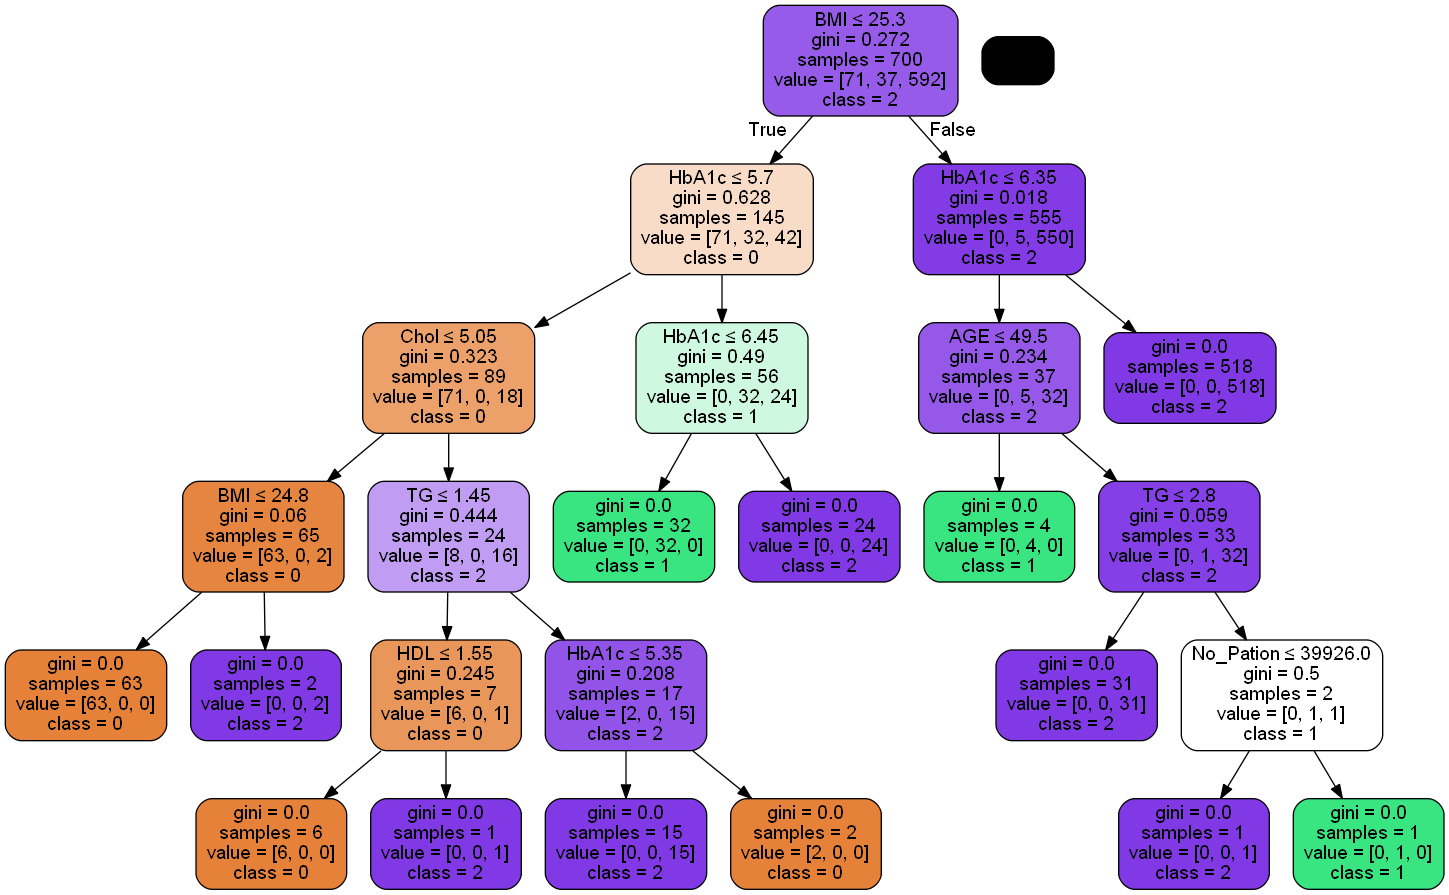

In [52]:
"""Visualizamos el árbol de decisión"""
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

El árbol de decisión completo es difícil de interpretar debido a la complejidad del resultado. La poda/acortamiento de un árbol es fundamental para facilitar la comprensión del resultado y optimizarlo. Esta optimización se puede realizar de tres maneras:

* **criterio**: opcional (predeterminado="gini") o Elegir medida de selección de atributo

Define qué función se utilizará para medir la calidad de una división. Las opciones son "gini" y "entropía". La relación de Gini mide la impureza del nodo en un árbol de decisión. Se puede suponer que un nodo es puro cuando todos sus registros pertenecen a la misma clase.

* **divisor**: cadena, opcional (predeterminado="mejor") o estrategia dividida

Define la estrategia utilizada para elegir la división en cada nodo. Las estrategias admitidas son "mejor" para elegir la mejor división y "aleatoria" para elegir la mejor división aleatoria.

* **max_depth**: int o Ninguno, opcional (predeterminado=Ninguno) o Profundidad máxima de un árbol

Define la profundidad máxima del árbol. Si es Ninguno, el árbol será lo más largo posible, cuando todas las hojas estén puras (riesgo de sobreajuste del modelo).

In [54]:
"""Crea un objeto clasificador del árbol de decisión"""
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
"""Entrena el clasificador del árbol de decisiones"""
clf = clf.fit(X_train,y_train)
"""Predice la respuesta para el conjunto de datos de prueba"""
y_pred = clf.predict(X_test)

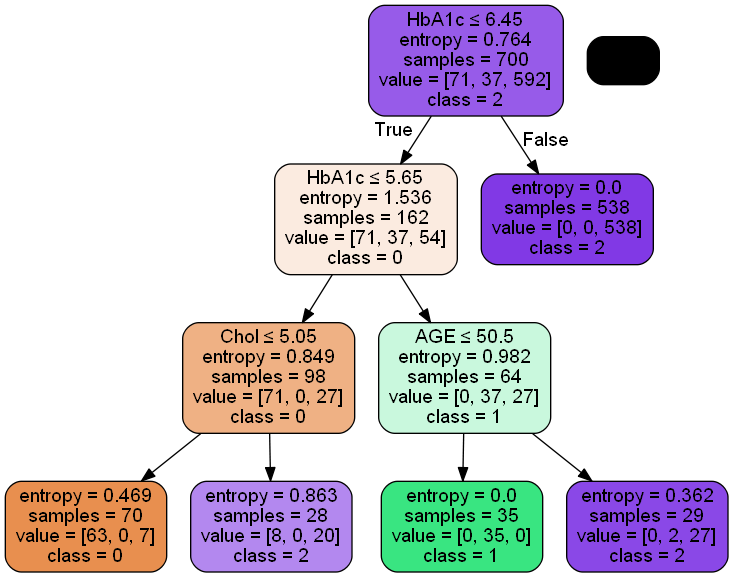

In [55]:
"""Visualización del árbol pre-podado"""

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

## Matriz de confusión


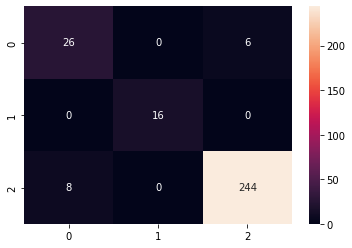

In [56]:
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,fmt= 'd')
pl.show()

## Métricas

In [57]:
"""Calulamos la exactitud de nuestro modelo"""
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

"""Calculamos la sensibilidad de nuestro modelo"""
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

"""Calculalos la precisión de nuestro modelo"""
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))

Accuracy: 0.9533333333333334
Recall: 0.9269179894179894
Precision: 0.9135686274509803
